<a href="https://colab.research.google.com/github/vitorinojuliano/Projeto1---Panda/blob/main/Projeto1_Panda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto prático:
* Dataset: Titanic.csv
* Modelos treinados: Regressão Logística e Random
Forest.
* Avaliação com métricas adequadas e explicação de qual se saiu melhor e por quê.


# 1. IMPORTAÇÕES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Configuração de visualização
plt.style.use('ggplot')
sns.set_palette("husl")
%matplotlib inline

# 2. CARREGAMENTO DOS DADOS

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (891, 12)

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 3. ANÁLISE EXPLORATÓRIA

In [6]:
print("Informações do dataset:")
print(df.info())

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [7]:
print("Estatísticas descritivas:")
print(df.describe())

Estatísticas descritivas:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [8]:
print("Valores missing por coluna:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Valores missing por coluna:
Age         177
Cabin       687
Embarked      2
dtype: int64


In [9]:
print("Distribuição da variável target (Survived):")
print(df['Survived'].value_counts())
print(f"\nProporção: {df['Survived'].mean():.2%}")

Distribuição da variável target (Survived):
Survived
0    549
1    342
Name: count, dtype: int64

Proporção: 38.38%


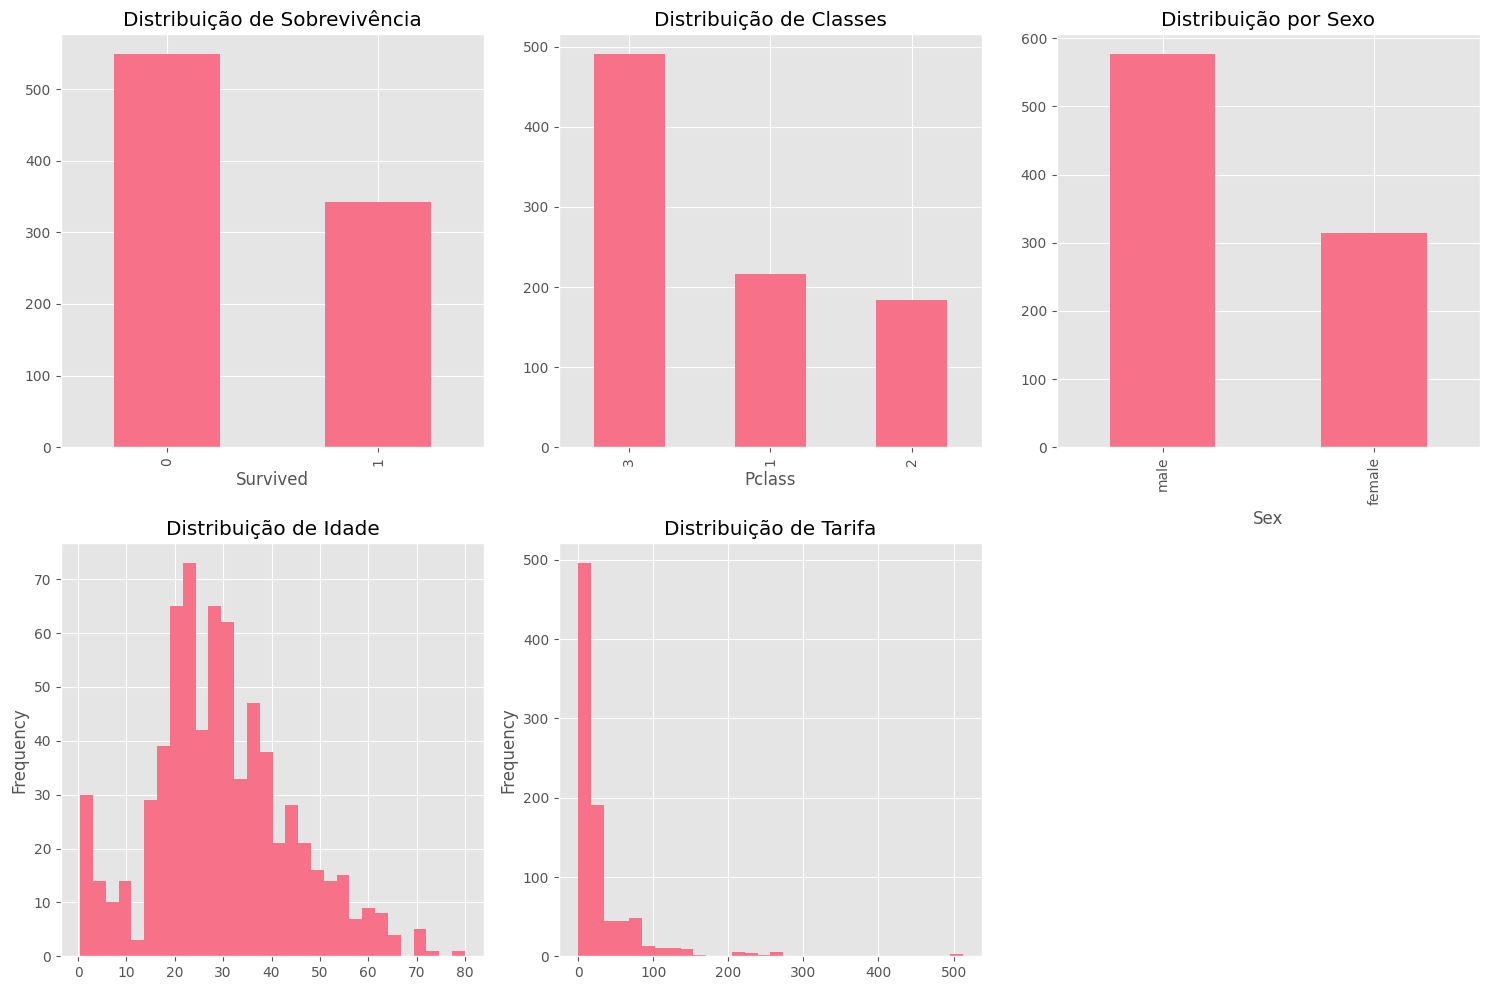

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

df['Survived'].value_counts().plot(kind='bar', ax=axes[0,0], title='Distribuição de Sobrevivência')
df['Pclass'].value_counts().plot(kind='bar', ax=axes[0,1], title='Distribuição de Classes')
df['Sex'].value_counts().plot(kind='bar', ax=axes[0,2], title='Distribuição por Sexo')

df['Age'].plot(kind='hist', bins=30, ax=axes[1,0], title='Distribuição de Idade')
df['Fare'].plot(kind='hist', bins=30, ax=axes[1,1], title='Distribuição de Tarifa')

axes[1,2].axis('off')
plt.tight_layout()
plt.show()

In [11]:
print("Taxa de sobrevivência por características:")
print(f"Por classe:\n{df.groupby('Pclass')['Survived'].mean()}")
print(f"\nPor sexo:\n{df.groupby('Sex')['Survived'].mean()}")
print(f"\nPor porto de embarque:\n{df.groupby('Embarked')['Survived'].mean()}")

Taxa de sobrevivência por características:
Por classe:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Por sexo:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Por porto de embarque:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


# Dicionário dos dados acima:
* Survived: 0 = Não, 1 = Sim

* Pclass: 1 = 1ª Classe, 2 = 2ª Classe, 3 = 3ª Classe

* Embarked: C = Cherbourg, Q = Queenstown, S = Southampton

* Sex: male = Masculino, female = Feminino

# 4. PRÉ-PROCESSAMENTO

In [15]:
df_clean = df.copy()

# Tratando de valores missing
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())  # Preenche idade missing com mediana
df_clean['Embarked'] = df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0])  # Preenche embarked missing com moda

# Removendo colunas irrelevantes
df_clean.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

print("Valores missing depois tratamento:")
print(df_clean.isnull().sum())

Valores missing depois tratamento:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [16]:
# One-hot encoding para variáveis categóricas
df_clean = pd.get_dummies(df_clean, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

print("Variáveis após one-hot encoding:")
print(df_clean.columns.tolist())
print(f"\nShape final: {df_clean.shape}")
print("\nPrimeiras 3 linhas:")
display(df_clean.head(3))

Variáveis após one-hot encoding:
['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3']

Shape final: (891, 10)

Primeiras 3 linhas:


,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True


# 5. DIVISÃO TREINO/TESTE

In [20]:
X = df_clean.drop('Survived', axis=1)
y = df_clean['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Treino: {X_train.shape[0]} amostras")
print(f"Teste: {X_test.shape[0]} amostras")
print(f"\nProporção de sobreviventes no treino: {y_train.mean():.2%}")
print(f"Proporção de sobreviventes no teste: {y_test.mean():.2%}")

Treino: 712 amostras
Teste: 179 amostras

Proporção de sobreviventes no treino: 38.34%
Proporção de sobreviventes no teste: 38.55%


# 6. TREINO DOS MODELOS

In [22]:
# Regressão Logística
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# 7. AVALIAÇÃO E COMPARAÇÃO

In [33]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"{model_name}:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print("\n")

    return accuracy, precision, recall, f1

print("RESULTADOS DOS MODELOS:\n")
lr_metrics = evaluate_model(y_test, lr_pred, "Regressão Logística")
rf_metrics = evaluate_model(y_test, rf_pred, "Random Forest")

RESULTADOS DOS MODELOS:

Regressão Logística:
Accuracy:  0.7989
Precision: 0.7797
Recall:    0.6667
F1-Score:  0.7188


Random Forest:
Accuracy:  0.8156
Precision: 0.7903
Recall:    0.7101
F1-Score:  0.7481




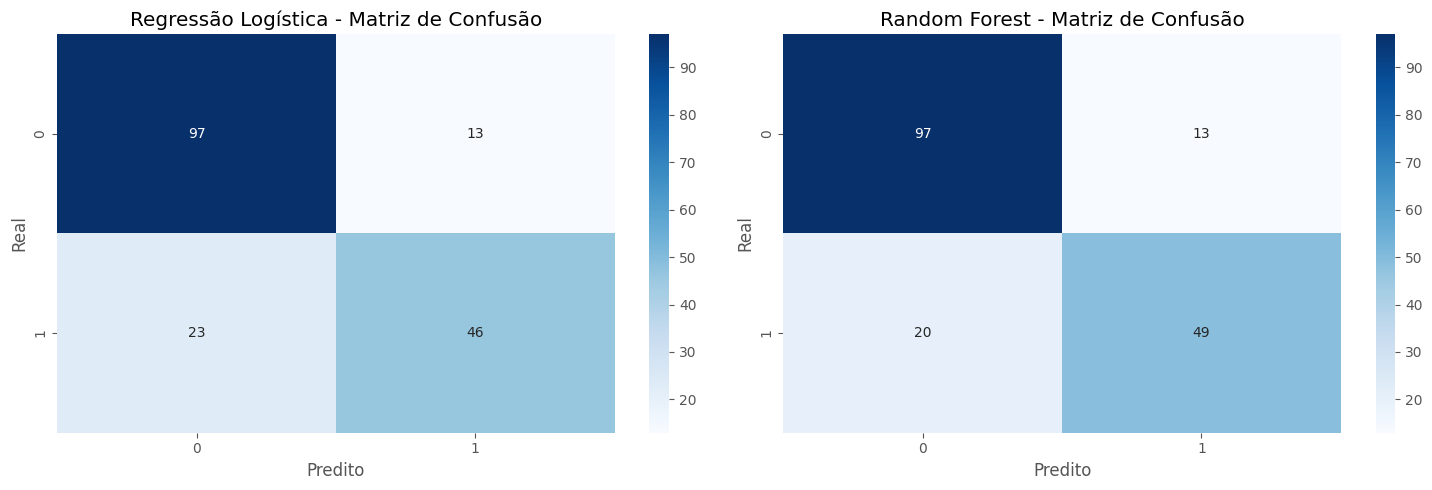

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

cm_lr = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Regressão Logística - Matriz de Confusão')
axes[0].set_xlabel('Predito')
axes[0].set_ylabel('Real')

cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Random Forest - Matriz de Confusão')
axes[1].set_xlabel('Predito')
axes[1].set_ylabel('Real')

plt.tight_layout()
plt.show()

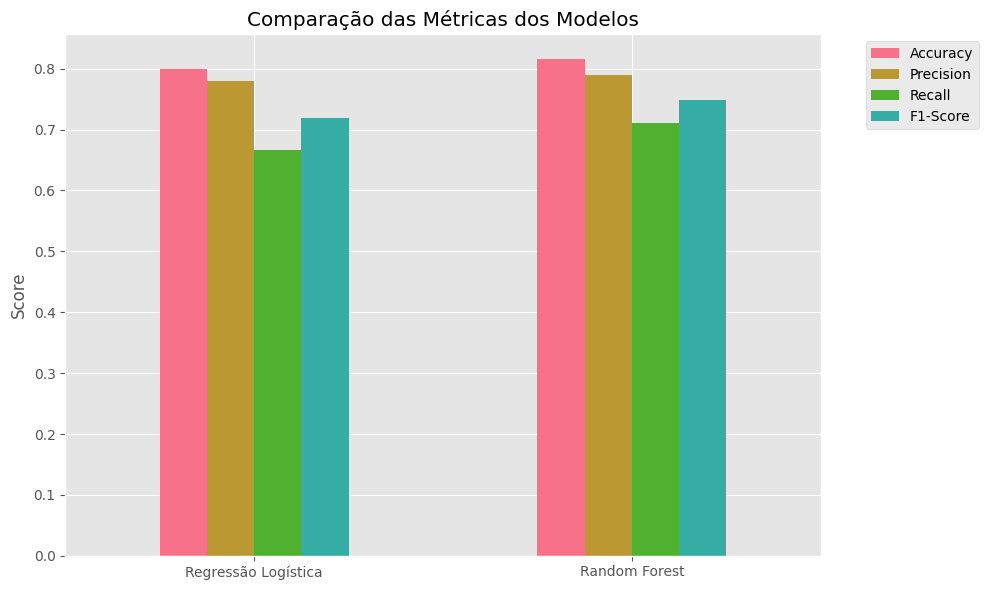

In [36]:
# Comparação visual das métricas
metrics_df = pd.DataFrame({
    'Regressão Logística': lr_metrics,
    'Random Forest': rf_metrics
}, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

metrics_df.T.plot(kind='bar', figsize=(10, 6))
plt.title('Comparação das Métricas dos Modelos')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 8. CONCLUSÕES


### PERFORMANCE DOS MODELOS

* Random Forest: 81.6% de acurácia
* Regressão Logística: 79.9% de acurácia
* Diferença: 1.7% pontos a favor do Random Forest

### MODELO: RANDOM FOREST

* Melhor em todas as métricas avaliadas
* Maior sensibilidade (recall)
* Balance ideal entre precision e recall (F1-Score mais alto)

### POR QUE RANDOM FOREST FOI MELHOR

* Lida melhor com relações não-lineares nos dados
* Captura interações complexas entre features
* Menos sensível a outliers que Regressão Logística
* Natureza ensemble combina múltiplas árvores de decisão
